## Entirely inspired by https://github.com/omarsayed7/Deep-Emotion

# Import

In [1]:
from __future__ import print_function
import importlib
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

from data_loaders import Plain_Dataset, eval_data_dataloader
from deep_emotion import Deep_Emotion
from generate_data import Generate_data


# Train the model

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def Train(epochs,train_loader,val_loader,criterion,optmizer,device):
    '''
    Training Loop
    '''
    print("===================================Start Training===================================")
    for e in range(epochs):
        train_loss = 0
        validation_loss = 0
        train_correct = 0
        val_correct = 0
        # Train the model  #
        net.train()
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optmizer.zero_grad()
            outputs = net(data)
            loss = criterion(outputs,labels)
            loss.backward()
            optmizer.step()
            train_loss += loss.item()
            _, preds = torch.max(outputs,1)
            train_correct += torch.sum(preds == labels.data)

        #validate the model#
        net.eval()
        for data,labels in val_loader:
            data, labels = data.to(device), labels.to(device)
            val_outputs = net(data)
            val_loss = criterion(val_outputs, labels)
            validation_loss += val_loss.item()
            _, val_preds = torch.max(val_outputs,1)
            val_correct += torch.sum(val_preds == labels.data)

        train_loss = train_loss/len(train_dataset)
        train_acc = train_correct.double() / len(train_dataset)
        validation_loss =  validation_loss / len(validation_dataset)
        val_acc = val_correct.double() / len(validation_dataset)
        print('Epoch: {} \tTraining Loss: {:.8f} \tValidation Loss {:.8f} \tTraining Acuuarcy {:.3f}% \tValidation Acuuarcy {:.3f}%'
                                                           .format(e+1, train_loss,validation_loss,train_acc * 100, val_acc*100))

    torch.save(net.state_dict(),'deep_emotion-{}-{}-{}.pt'.format(epochs,batchsize,lr))
    print("===================================Training Finished===================================")


#if __name__ == '__main__':
    #parser = argparse.ArgumentParser(description="Configuration of setup and training process")
    #parser.add_argument('-s', '--setup', type=bool, help='setup the dataset for the first time')
    #parser.add_argument('-d', '--data', type=str,required= True,
                               #help='data folder that contains data files that downloaded from kaggle (train.csv and test.csv)')
    #parser.add_argument('-hparams', '--hyperparams', type=bool,
                               #help='True when changing the hyperparameters e.g (batch size, LR, num. of epochs)')
    #parser.add_argument('-e', '--epochs', type= int, help= 'number of epochs')
    #parser.add_argument('-lr', '--learning_rate', type= float, help= 'value of learning rate')
    #parser.add_argument('-bs', '--batch_size', type= int, help= 'training/validation batch size')
    #parser.add_argument('-t', '--train', type=bool, help='True when training')
    #args = parser.parse_args()

    #if args.setup :
generate_dataset = Generate_data('data')
generate_dataset.split_test()
generate_dataset.save_images()
generate_dataset.save_images('finaltest')
generate_dataset.save_images('val')
#pdb.set_trace()

    #if args.hyperparams:
        #epochs = args.epochs
        #lr = args.learning_rate
        #batchsize = args.batch_size
    #else :
epochs = 100
lr = 0.005
batchsize = 128

    #if args.train:
    
net = Deep_Emotion() # creating the model
net.to(device) # moving to cpu or gpu
print("Model archticture: ", net)
traincsv_file = 'data'+'/'+'train.csv'
validationcsv_file = 'data'+'/'+'val.csv'
train_img_dir = 'data'+'/'+'train/'
validation_img_dir = 'data'+'/'+'val/'

transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
train_dataset= Plain_Dataset(csv_file=traincsv_file, img_dir = train_img_dir, datatype = 'train', transform = transformation)
validation_dataset= Plain_Dataset(csv_file=validationcsv_file, img_dir = validation_img_dir, datatype = 'val', transform = transformation)
train_loader= DataLoader(train_dataset,batch_size=batchsize,shuffle = True,num_workers=0)
val_loader=   DataLoader(validation_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

criterion= nn.CrossEntropyLoss()
optmizer= optim.Adam(net.parameters(),lr= lr)
Train(epochs, train_loader, val_loader, criterion, optmizer, device)

torch.save(net.state_dict(),'DeepEmotion_trained.pt')


Done splitting the test file into validation & final test file


 40%|███▉      | 11474/28709 [00:16<00:24, 710.92it/s]


KeyboardInterrupt: 

# Test with static images

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Deep_Emotion()
net.load_state_dict(torch.load('DeepEmotion_trained.pt'))
net.to(device)

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
frame = cv2.imread('neutral.jpeg')

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [ ]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [ ]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        
        if len(facess) == 0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh, ex:ex+ew]

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
plt.imshow(face_roi)

In [ ]:
face_roi.shape

In [ ]:
final_image = cv2.resize(gray,(48,48))

In [ ]:
final_image.shape

In [ ]:
final_image = np.expand_dims(final_image, axis = 0)
final_image = np.expand_dims(final_image, axis = 0)

In [ ]:
final_image.shape

In [ ]:
final_image = final_image/255.0 #normalize

In [ ]:
dataa = torch.from_numpy(final_image)

In [ ]:
dataa = dataa.type(torch.FloatTensor)

In [ ]:
dataa = dataa.to(device)

In [ ]:
outputs = net(dataa)
pred = F.softmax(outputs, dim=1)

In [ ]:
print(pred)

In [ ]:
print(torch.argmax(pred))

# Live webcam Demo (with model alread trained)

In [3]:
from __future__ import print_function
import importlib
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

from data_loaders import Plain_Dataset, eval_data_dataloader
from deep_emotion import Deep_Emotion
from generate_data import Generate_data
import cv2
from deepface import DeepFace


import matplotlib.pyplot as plt
import math
from IPython.display import display, clear_output



In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Deep_Emotion()
net.load_state_dict(torch.load('DeepEmotion_trained.pt'))
net.to(device)

Deep_Emotion(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=7, bias=True)
  (localization): Sequential(
    (0): Conv2d(1, 8, kernel_size=(7, 7), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplac

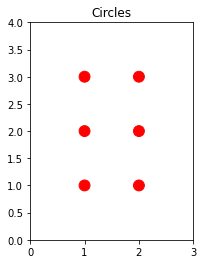

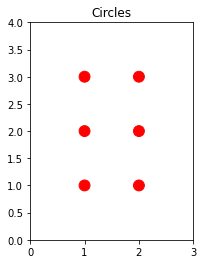

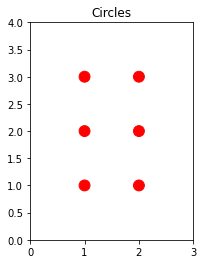

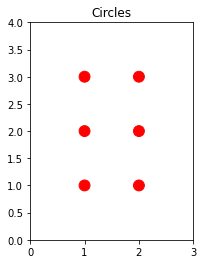

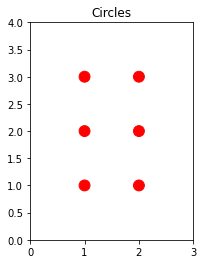

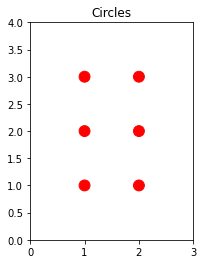

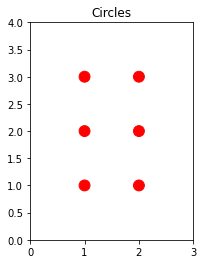

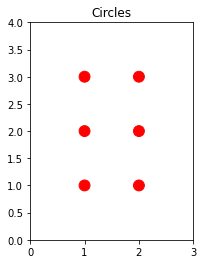

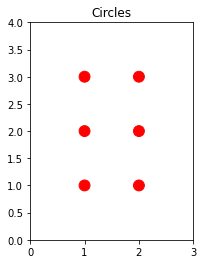

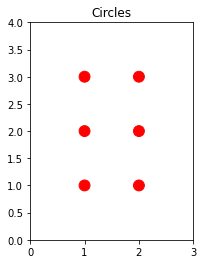

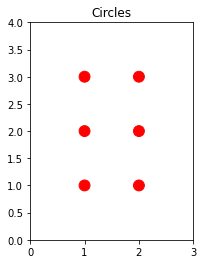

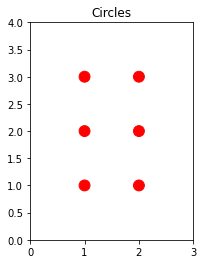

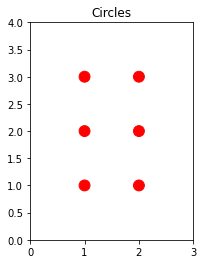

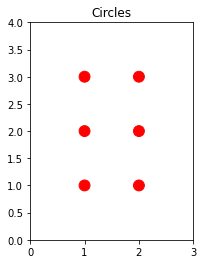

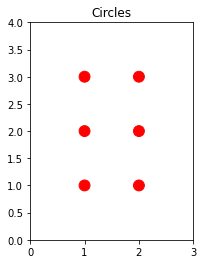

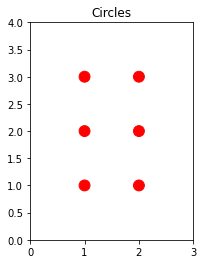

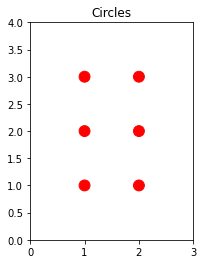

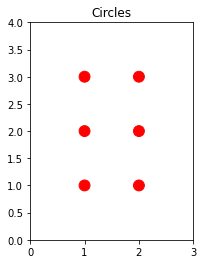

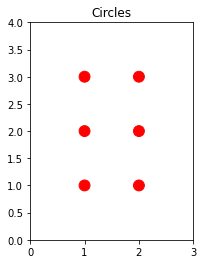

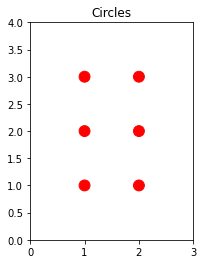

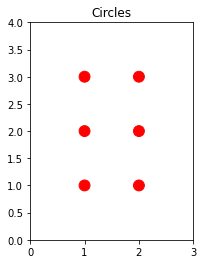

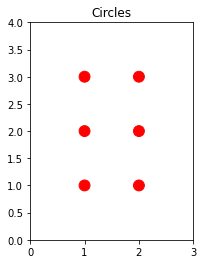

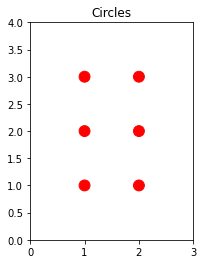

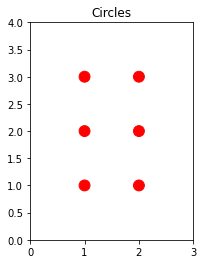

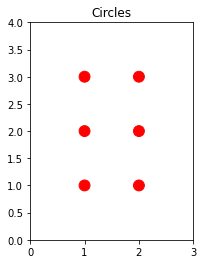

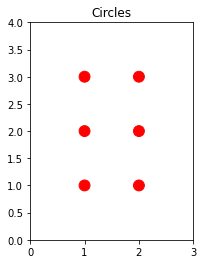

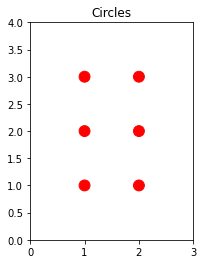

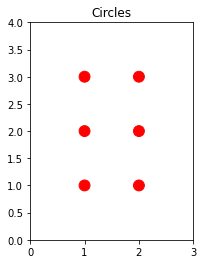

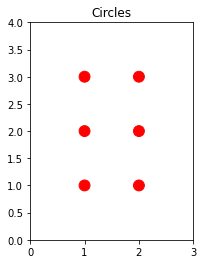

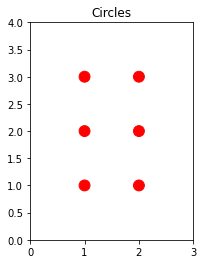

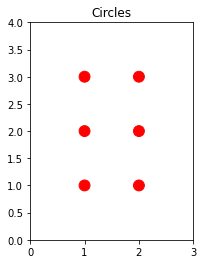

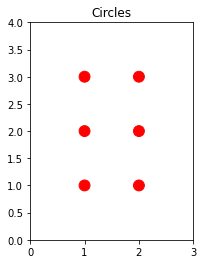

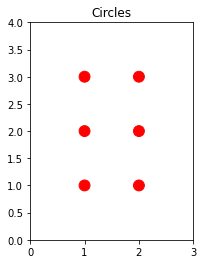

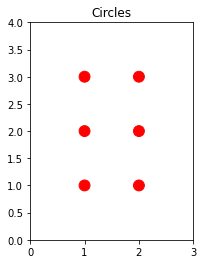

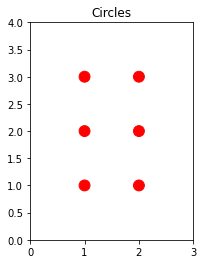

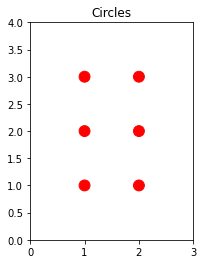

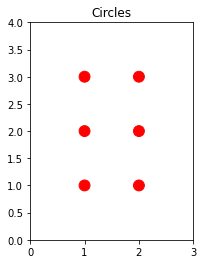

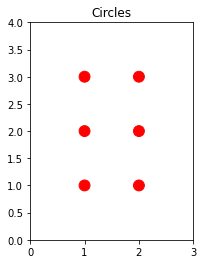

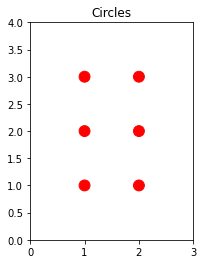

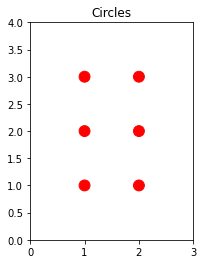

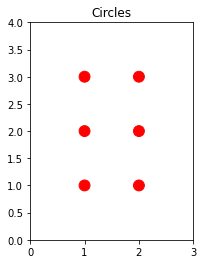

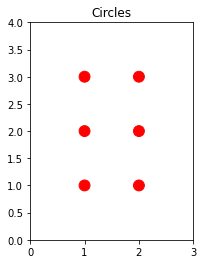

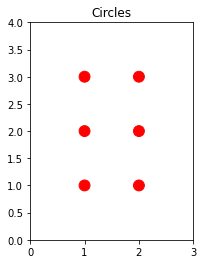

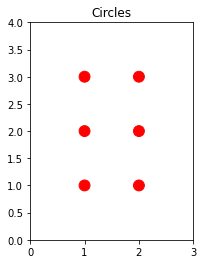

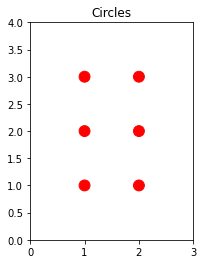

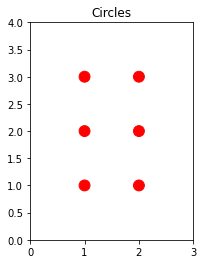

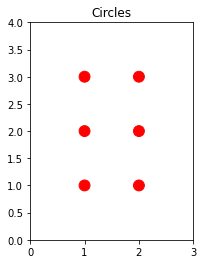

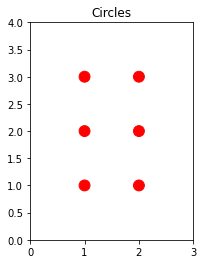

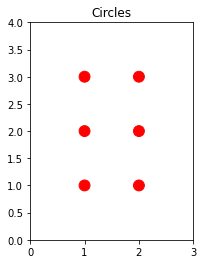

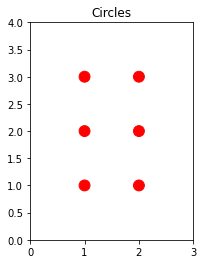

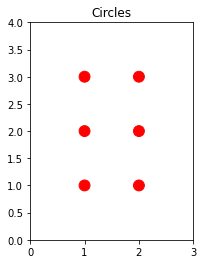

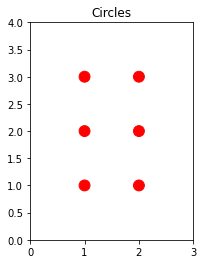

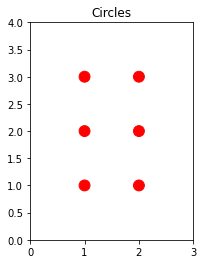

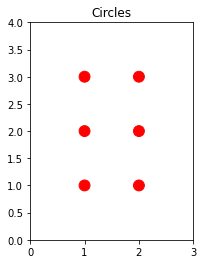

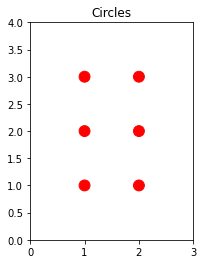

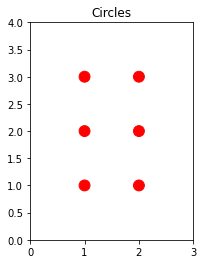

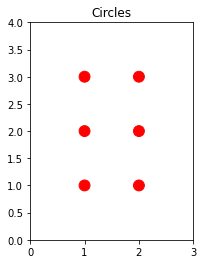

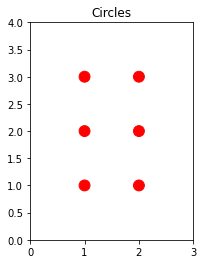

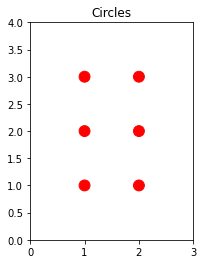

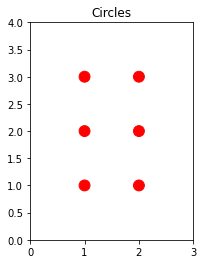

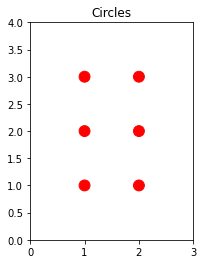

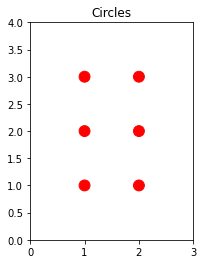

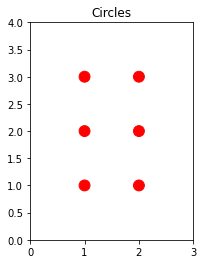

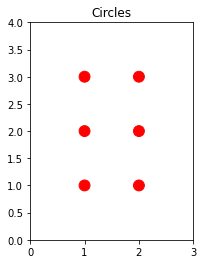

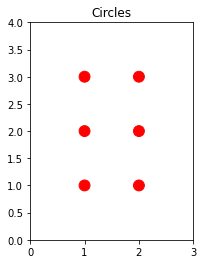

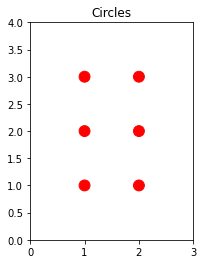

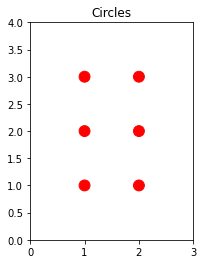

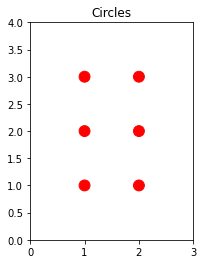

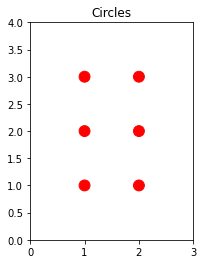

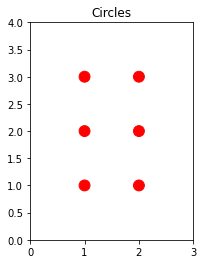

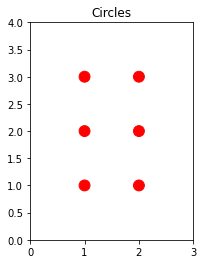

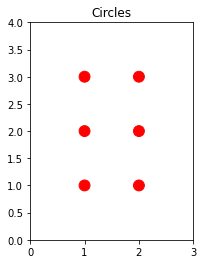

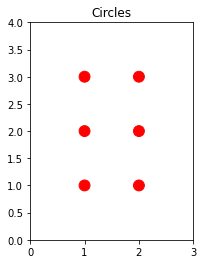

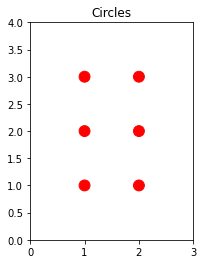

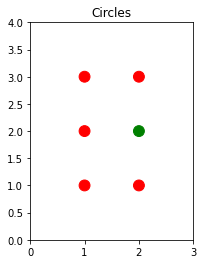

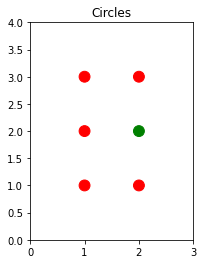

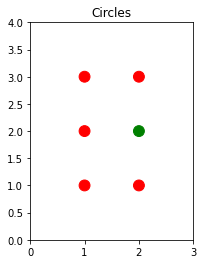

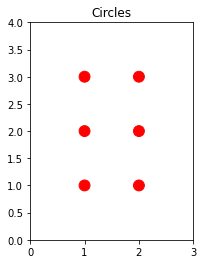

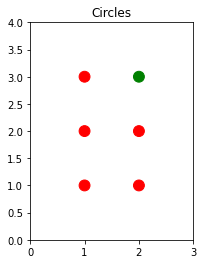

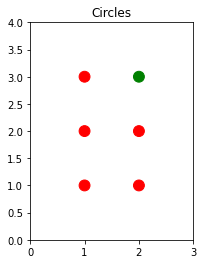

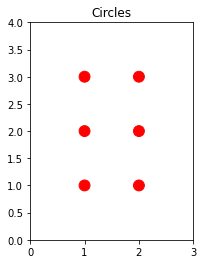

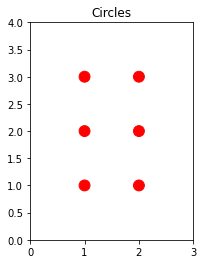

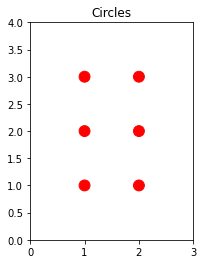

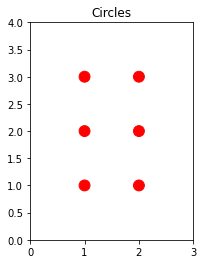

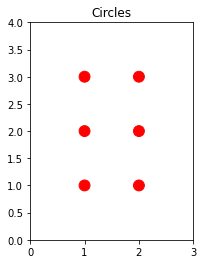

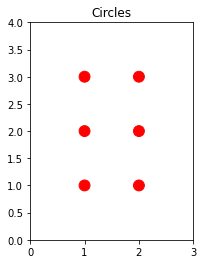

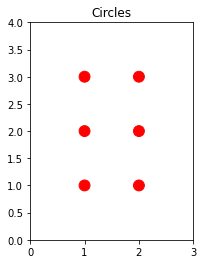

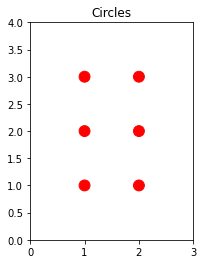

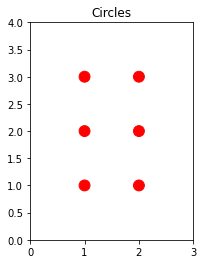

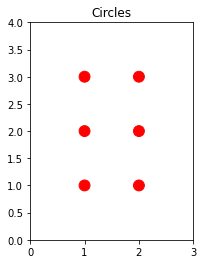

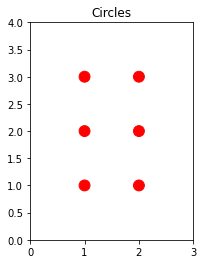

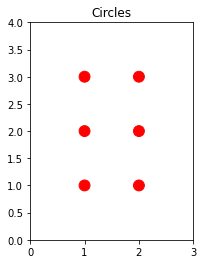

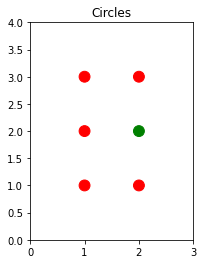

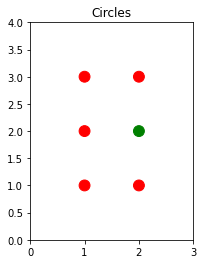

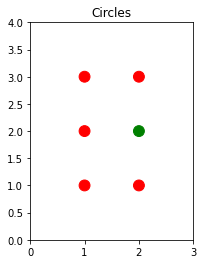

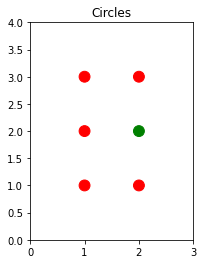

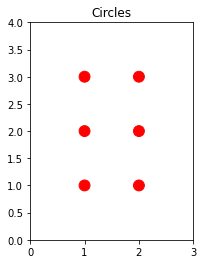

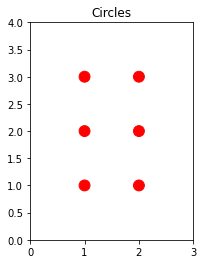

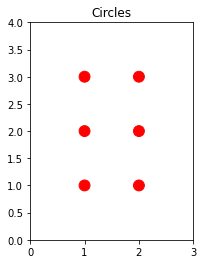

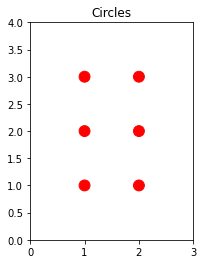

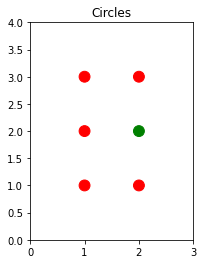

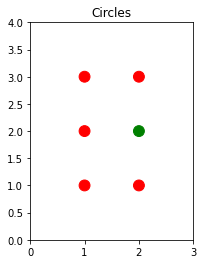

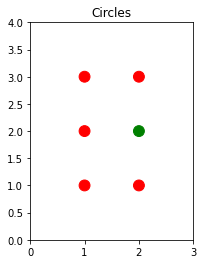

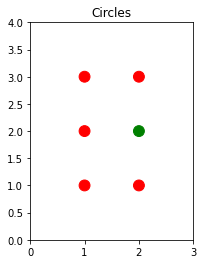

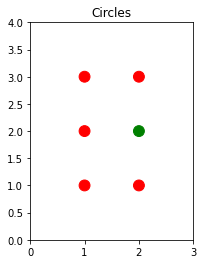

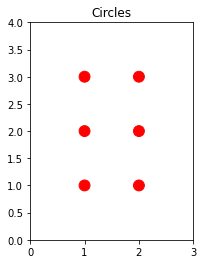

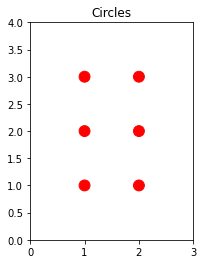

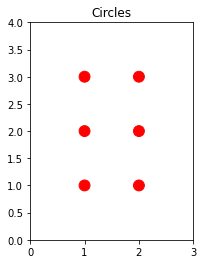

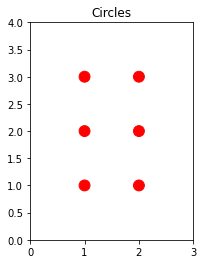

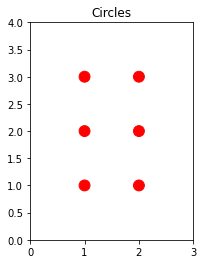

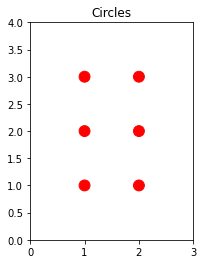

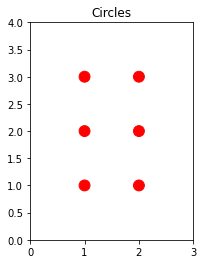

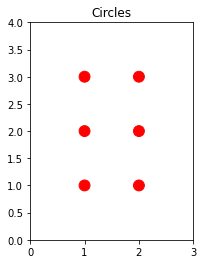

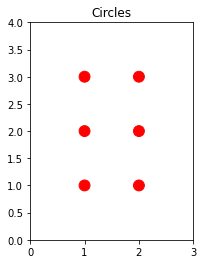

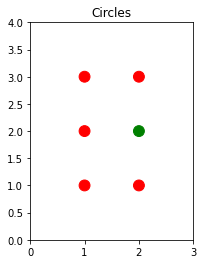

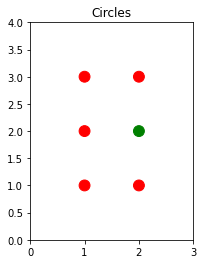

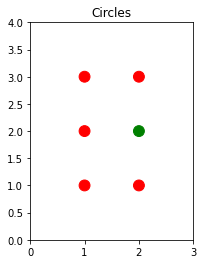

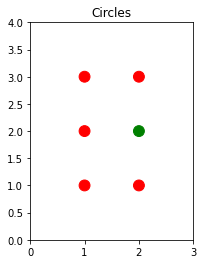

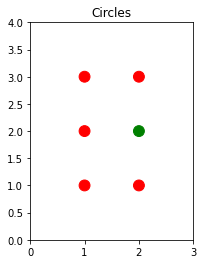

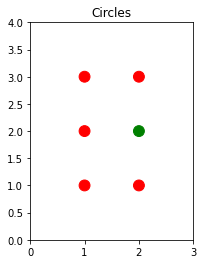

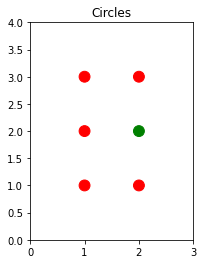

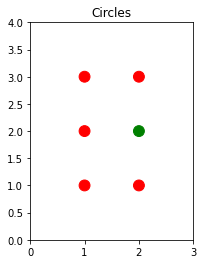

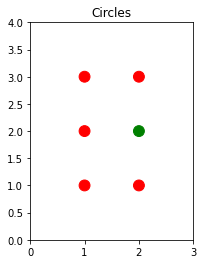

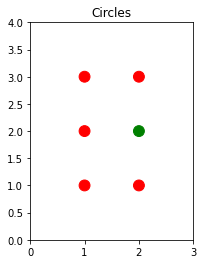

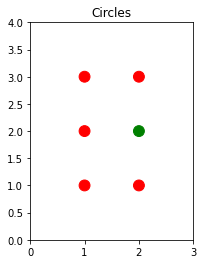

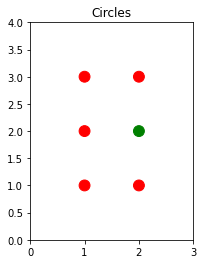

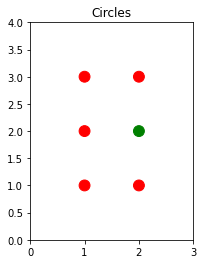

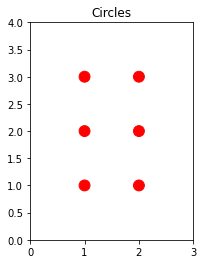

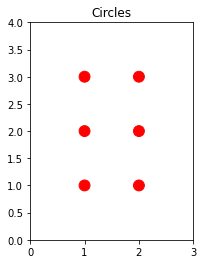

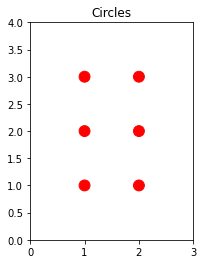

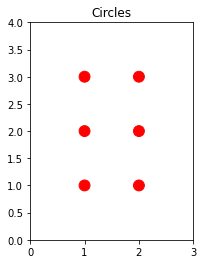

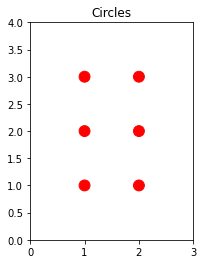

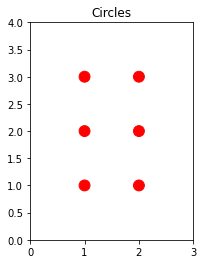

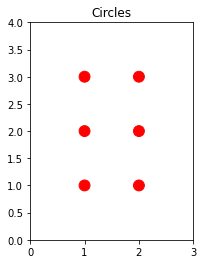

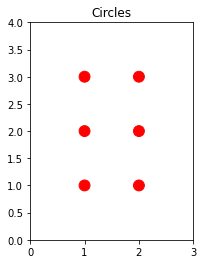

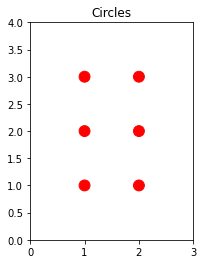

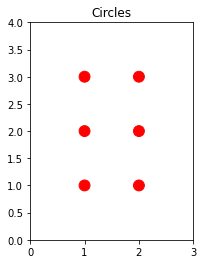

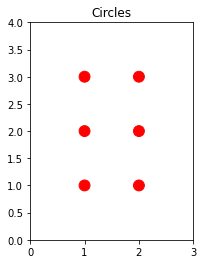

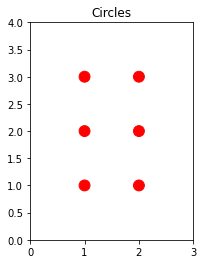

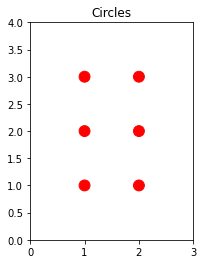

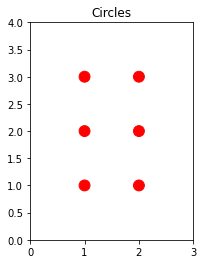

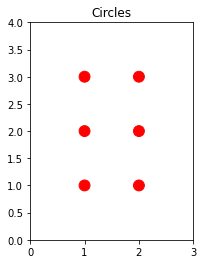

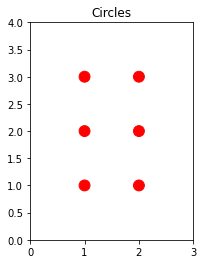

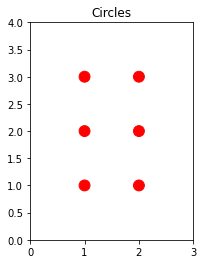

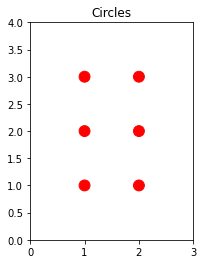

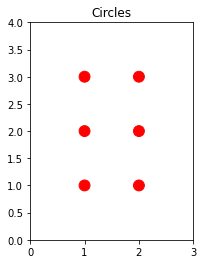

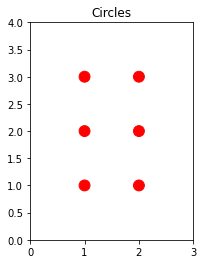

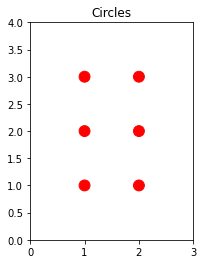

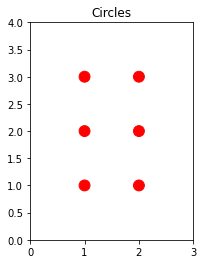

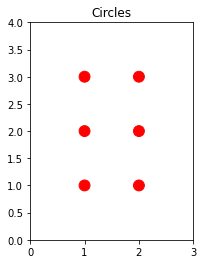

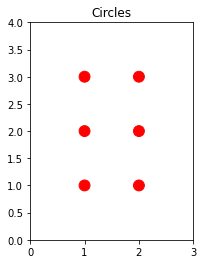

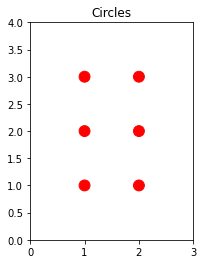

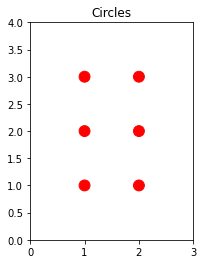

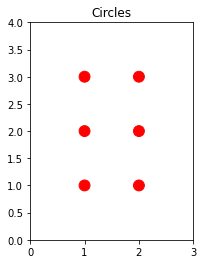

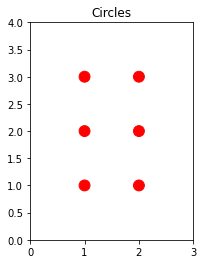

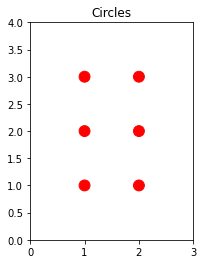

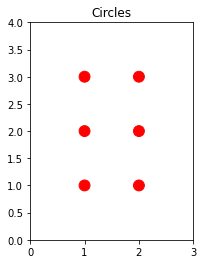

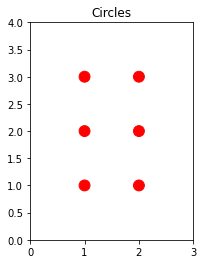

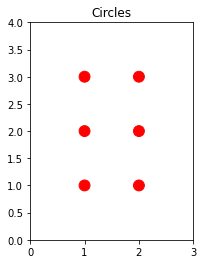

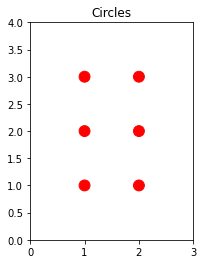

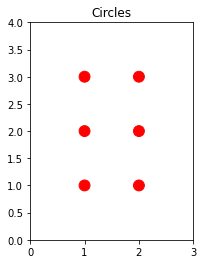

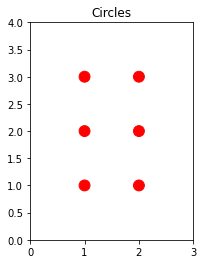

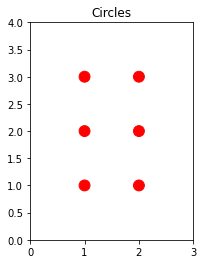

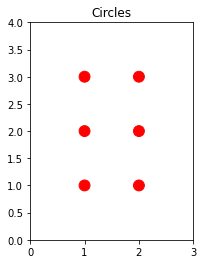

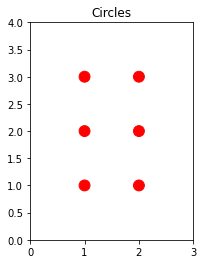

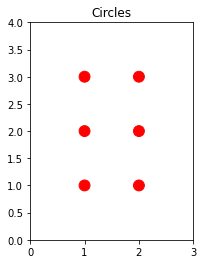

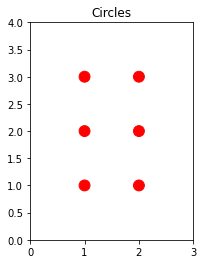

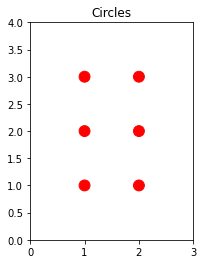

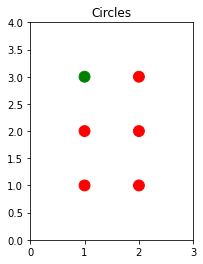

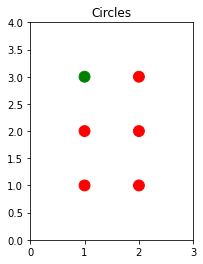

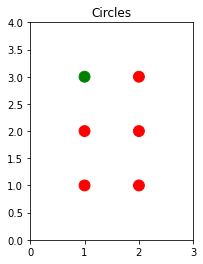

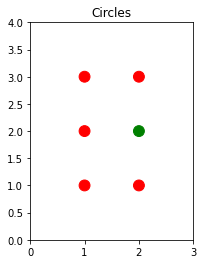

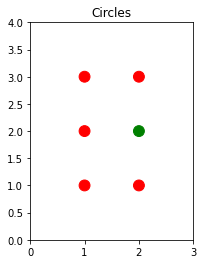

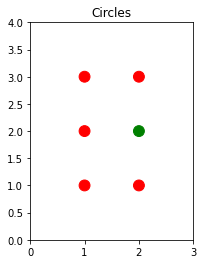

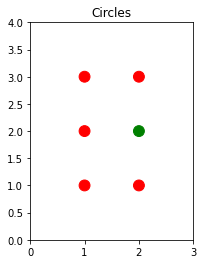

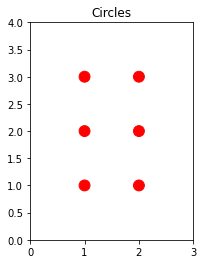

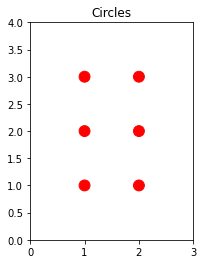

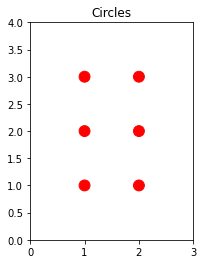

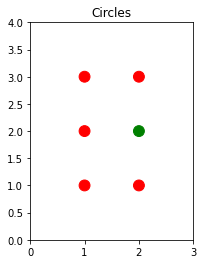

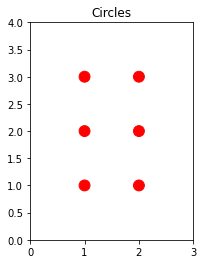

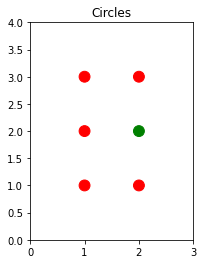

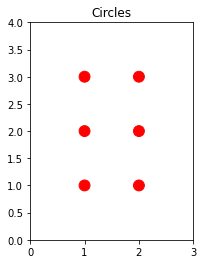

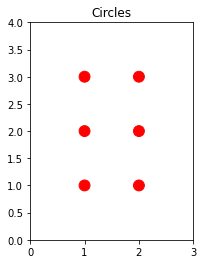

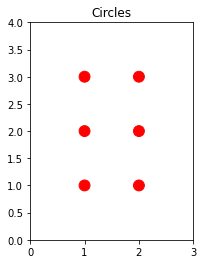

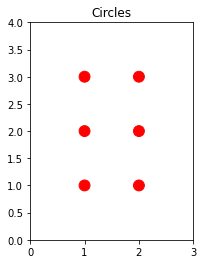

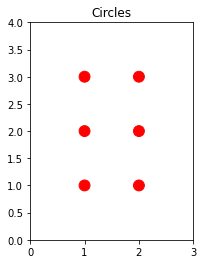

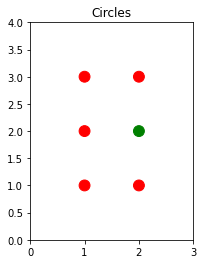

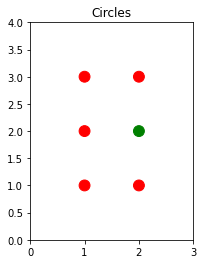

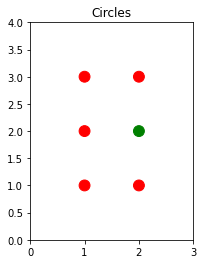

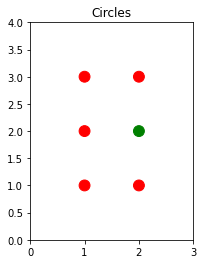

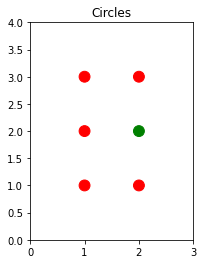

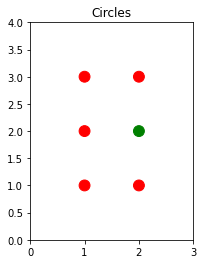

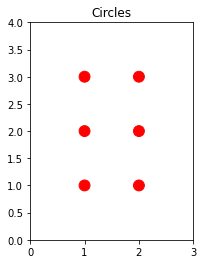

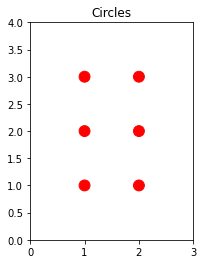

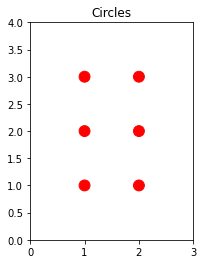

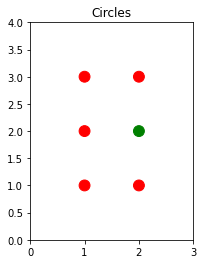

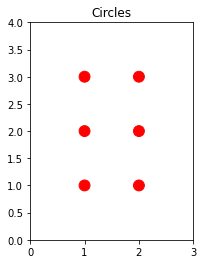

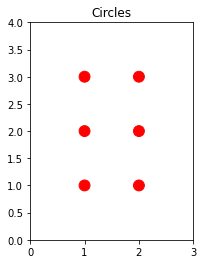

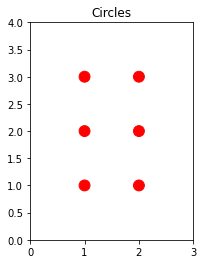

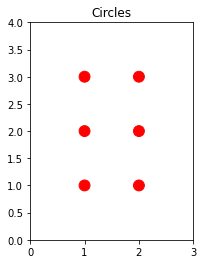

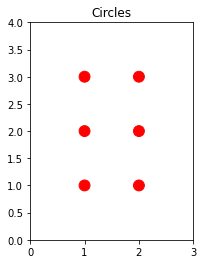

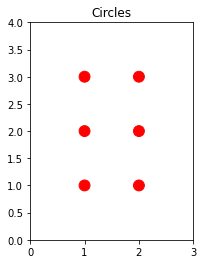

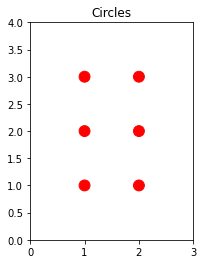

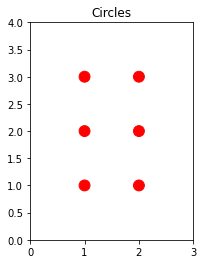

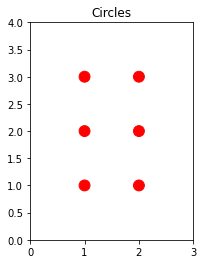

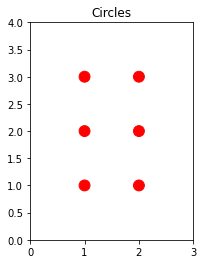

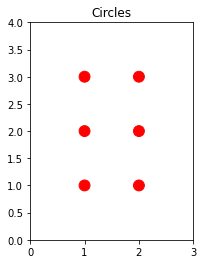

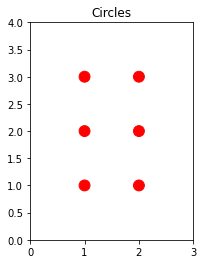

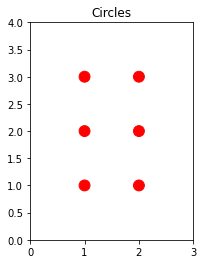

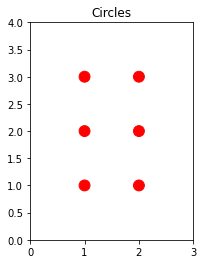

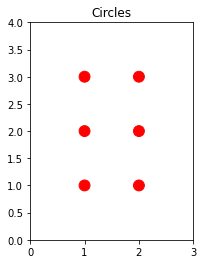

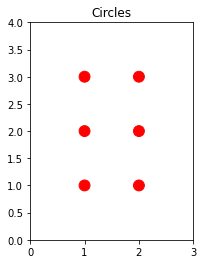

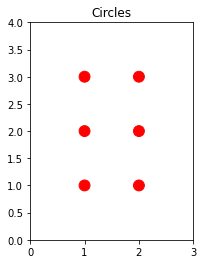

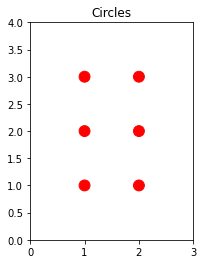

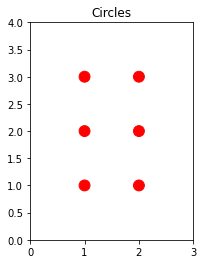

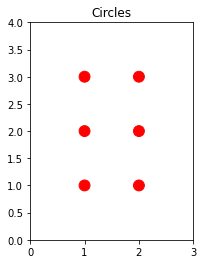

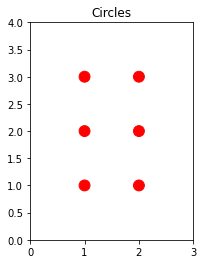

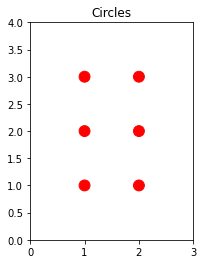

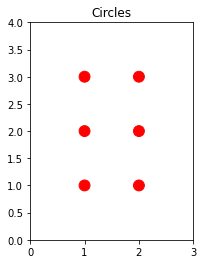

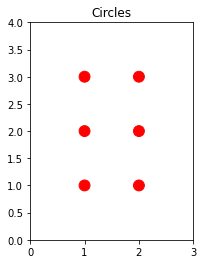

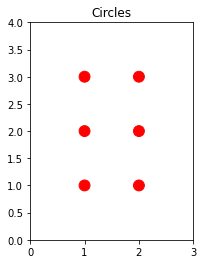

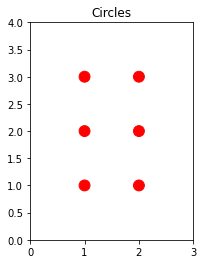

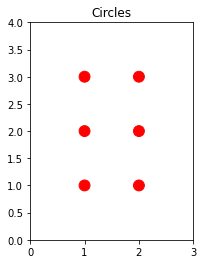

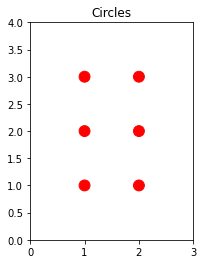

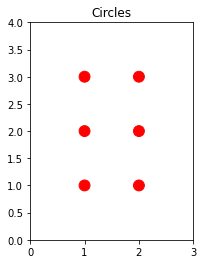

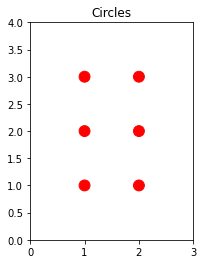

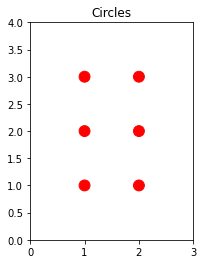

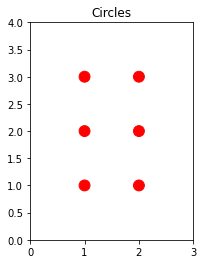

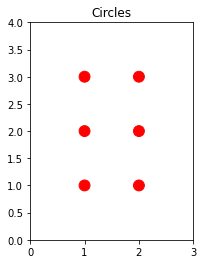

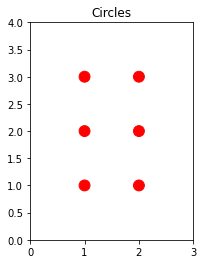

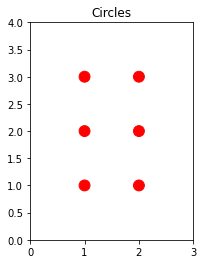

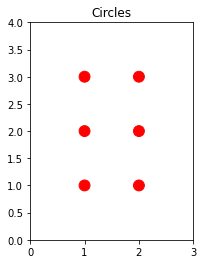

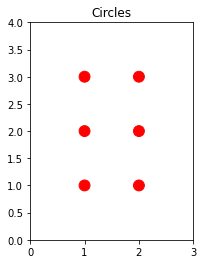

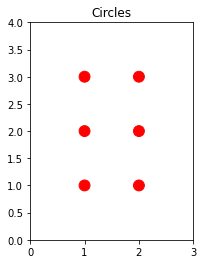

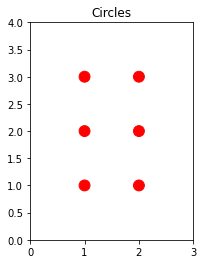

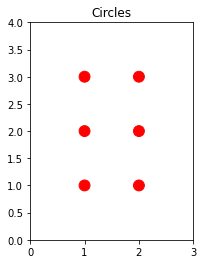

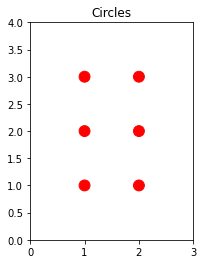

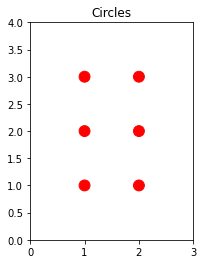

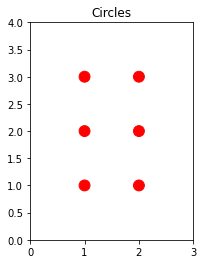

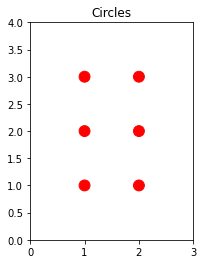

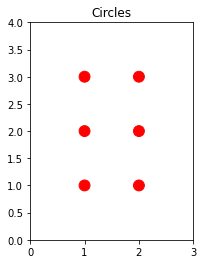

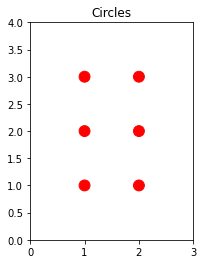

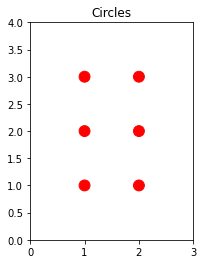

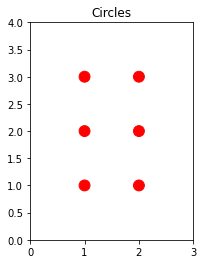

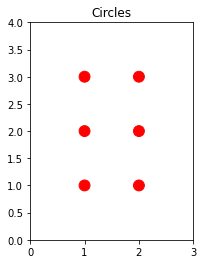

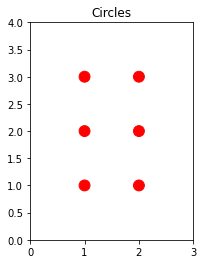

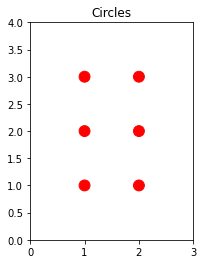

In [8]:
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
rectangle_bgr = (255,255,255)
img = np.zeros((500,500))
text = "Some text"
(text_width, text_height) = cv2.getTextSize(text,font,fontScale= font_scale, thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img,box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color= (0,0,0), thickness = 1)

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")
    
emotions = []   
main_emos = []
valences = []
main_vals = []
ind = 0

# choose if you want to show the emotion "emo" or the valence "val"
res2show = "emo"

while True:
    facess_empty = 0
    ind = ind +1
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    face_roi = frame[0:1,0:1]
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)

        if len(facess) == 0:
            facess_empty = 1;
            #print("Face not detected")

        else:
            for(ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh, ex:ex+ew]

    graytemp = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
    final_image = cv2.resize(graytemp, (48,48))
    
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    dataa = torch.from_numpy(final_image)
    dataa = dataa.type(torch.FloatTensor)
    dataa = dataa.to(device)
    outputs = net(dataa)
    Pred = F.softmax(outputs, dim = 1)
    Predictions = torch.argmax(Pred)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if ((Predictions)==0):
        status = "Angry"
        valence = "neg"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
 
    elif ((Predictions)==1):
        status = "Disgust"
        valence = "neg"

        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    
    if ((Predictions)==2):
        status = "Fear"
        valence = "neg"

        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))

    if ((Predictions)==3):
        status = "Happy"
        valence = "pos"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    if ((Predictions)==4):
        status = "Sad"
        valence = "neg"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))

    if ((Predictions)==5):
        status = "Surprised"
        valence = "pos"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    if ((Predictions)==6):
        status = "Neutral"
        valence = "neu"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1),(x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
        cv2.imshow('Face Emotion Recognition', frame)
        
    #print("Status: " +status +", Valence: " + valence)

    
    ################################################## EMOTION DISPLAY
    if res2show == "emo":
        emotions.append(status)

        # average on n emotions before printing Braille and Main_emo text
        n = 5
        lastEmos = []
        main_emo = 'Neutral'

        def most_frequent(List):
            counter = 0
            num = List[0]
            for i in List:
                curr_frequency = List.count(i)
                if(curr_frequency> counter):
                    counter = curr_frequency
                    num = i
            return num

        if ind > n:
            lastEmos = emotions[ind-n:ind]
            main_emo =(most_frequent(lastEmos))
        main_emos.append(main_emo)

        # matrices 3x2
        m_neutral = ('r','r','r','r','r','r')
        m_happy = ('g','r','r','r','r','r')
        m_sad = ('r','g','r','r','r','r')
        m_angry = ('r','r','g','r','r','r')
        m_fear = ('r','r','r','g','r','r')
        m_disgust = ('r','r','r','r','g','r')
        m_surprised = ('r','r','r','r','g','r')


        emotion_matrix = {"Neutral": m_neutral,"Happy": m_happy, "Sad": m_sad,"Angry":  m_angry, "Fear": m_fear, "Disgust": m_disgust, "Surprised": m_surprised}
        res = emotion_matrix[main_emo]

        figure, axes = plt.subplots()

        dots = [[(1,3), (2,3)],
                [(1,2), (2,2)],
                [(1,1), (2,1)]]

        for i in range (0,len(res)):
            c = plt.Circle(dots[math.floor(i/2)][not(i % 2 == 0)], 0.1 , color = res[i]) 
            axes.set_aspect( 1 ) 
            axes.add_artist( c ) 

        axes.set_xlim([0, 3])
        axes.set_ylim([0, 4])

        plt.title( 'Circles' ) 
   
    ################################################## VALENCE DISPLAY
    elif res2show == "val": 

        valences.append(valence)

        # average on n emotions before printing Braille and Main_emo text
        n = 5
        lastVals = []
        main_val = 'neu'

        def most_frequent(List):
            counter = 0
            num = List[0]
            for i in List:
                curr_frequency = List.count(i)
                if(curr_frequency> counter):
                    counter = curr_frequency
                    num = i
            return num

        if ind > n:
            lastVal = valences[ind-n:ind]
            main_val =(most_frequent(lastVal))
        main_vals.append(main_val)

        valence_matrix = {"neu": 'k',"pos": 'g', "neg": 'r'}    
        figure, axes = plt.subplots()

        c = plt.Circle((0.5, 0.5), 0.2, color = valence_matrix[main_val]) 
        axes.set_aspect( 1 ) 
        axes.add_artist( c ) 

        plt.title( 'Valence' ) 


################################################## 



    # display 
    display(figure)
    if facess_empty:
        print("Face not detected")
    if res2show == "emo":
        print('last emotions: ', lastEmos)
        print('main emotion: ' + main_emo)
    if res2show == "val":
        print('last valence: ', lastVals)
        print('main valence: ' + main_val)    
        
    clear_output(wait = True)
    
    #plt.pause(0.5)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        breakq
            
cap.release()
cv2.destroyAllWindows()

In [ ]:
# 0 = angry
# 1 = disgust
# 2 = fear
# 3 = happy
# 4 = sad
# 5 = surprised
# 6 = neutral

# emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprised', 'neutral']
# positive = [3, 5]
# neutral  = [6]
# negative = [0,1,2,4]
